In [15]:
# example of a simple ODE, solved numerically
# y'(t) = f(t)

In [2]:
import numpy as np 
from matplotlib import pyplot as plt 
from numpy.linalg import norm

In [20]:
t0, tN, h = -1, 1, 0.05
t = np.arange(t0, tN+h, h)

In [5]:
# f(t) = y' = t**2

#this is a bad example cause here f is not dependent on y
def f(t,y):                     #TODO --> f(t, yt)
    dydt = t**2
    return dydt

def y(t):
    y = 1/3 * t**3 + 0
    return y
y0 = y(t0) #initial condition

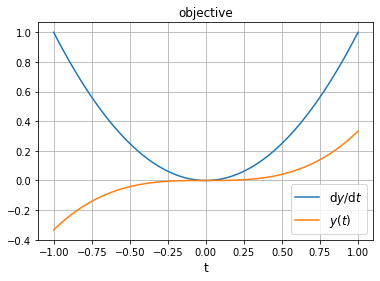

In [14]:
plt.plot(t,f(t, None), label="$\mathrm{d}y/\mathrm{d}t$")
plt.plot(t,y(t), label='$y(t)$')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('objective')
plt.show()

In [21]:
# solve the ODE using forward Euler method
# analytical solution given by: y(t) = 1/3 * t**3 + C

y_true = y(t) # y = 1/3 * t**3 + 0

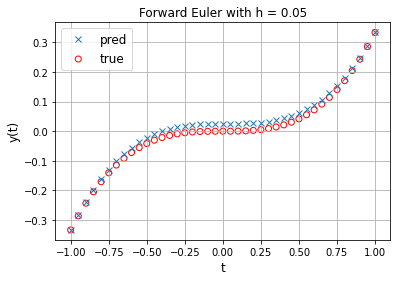

The L2-norm is: 0.11789039754506289


In [31]:
# Forward Euler
y_pred_FE = np.zeros(len(t))
y_pred_FE[0] = y0 #initial condition

for n in range(len(t)-1): #subtract 1 step because of init. cond. 
    y_pred_FE[n+1] = y_pred_FE[n] + h*f(t[n], None) 
error = norm([y_true - y_pred_FE],2)

plt.figure()
plt.scatter(t,y_true,facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_FE, marker='x',linestyle='',label='pred')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('Forward Euler with h = {0}'.format(h))
plt.show()
print('The L2-norm is: {0}'.format(error))

In [3]:
# another function, where is f(t, y(t))
def dydt(t, y):
    dydt = 2*y
    return dydt

def exact(t):
    return np.exp(2*t)

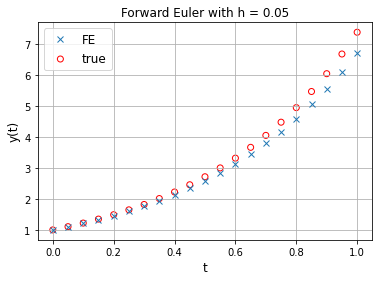

The L2-norm is: 1.26911430039941


In [23]:
# FORWARD EULER METHOD
t0 = 0; tN = 1; h = 0.05
t = np.arange(t0, tN+h, h)
y0 = 1 # exact(t0) = 1

y_pred_FE = np.zeros(len(t))
y_pred_FE[0] = y0
for n in range(len(t)-1):
    y_pred_FE[n+1] = y_pred_FE[n] + h*dydt(t,y_pred_FE[n])
error = norm([exact(t) - y_pred_FE],2)

plt.figure()
plt.scatter(t,exact(t),facecolors='none', edgecolors='r',label='true')
plt.plot(t, y_pred_FE, 'x', label='FE')
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.title('Forward Euler with h = {0}'.format(h))
plt.legend(loc='best',fontsize='large'); plt.grid(); plt.show()
print('The L2-norm is: {0}'.format(error))

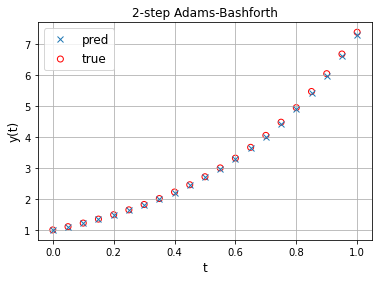

The L2-norm is: 0.18439630642631671


In [26]:
# ADAMS-BASHFORTH 2 STEP METHOD
t0 = 0; tN = 1; h = 0.05
t = np.arange(t0, tN+h, h)
y0 = 1 # exact(t0) = 1

y_pred_AB2 = np.zeros(len(t))
# initial conditions
y_pred_AB2[0] = y0
y_pred_AB2[1] = y_pred_AB2[0] + h*dydt(t, y_pred_AB2[0]) #one step FE
for n in range(len(t)-2):
    y_pred_AB2[n+2] = y_pred_AB2[n+1] + h*(3/2*dydt(None, y_pred_AB2[n+1]) - 1/2*dydt(None, y_pred_AB2[n]))
error = norm([exact(t) - y_pred_AB2],2)

plt.figure()
plt.scatter(t,exact(t),facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_AB2, marker='x',linestyle='',label='pred')
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('2-step Adams-Bashforth'); plt.grid(); plt.show()
print('The L2-norm is: {0}'.format(error))